In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy

In [30]:
#Daten einlesen
input_dir = '/Users/itz/Documents/_HSLU/2023_FS_IIP2/iip2/Data/Preparation/merged_typologien.xlsx'
df = pd.read_excel(input_dir)
df.head()

In [32]:
#rows mit ganzem Kanton luzern löschen
indexNames = df[df['Gemeinde'] == 'Kanton Luzern'].index
indexNames

Int64Index([   0,   81,  162,  243,  324,  405,  486,  567,  648,  729,  810,
             891,  972, 1053, 1134, 1215, 1296, 1377, 1458, 1539, 1620, 1701,
            1782, 1863, 1944, 2025, 2106, 2187, 2268, 2349, 2430],
           dtype='int64')

In [33]:
df.drop(indexNames , axis=0, inplace=True)
df = df.reset_index()
df.drop('index',  axis=1, inplace=True)
df.head()

In [35]:
#Kategrien erstellen
df_dummies = pd.get_dummies(df, columns=['Gemeindetypologien', 'Gemeinde'])
df_dummies.shape

(2480, 94)

In [37]:
#manuelles splitting für die Jahre
1991 - 2018 #training
2019, 2020, 2021 #test

test = df_dummies[df_dummies['Jahr'] > 2018]
train = df_dummies[df_dummies['Jahr'] <= 2018]

train.head()

In [40]:
#spalten, die wir nicht brauchen
columns_drop = ['Mittlere Wohnbevölkerung',
                    'Gemeinde ID',
                    'Ständige Wohnbevölkerung Total',
                    'Ständige Wohnbevölkerung Anteil 0-19-Jährige in %',
                    'Ständige Wohnbevölkerung Anteil 20-64-Jährige in %',
                    'Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %',
                    'Ständige Wohnbevölkerung Ausländer-anteil in %']

train = train.drop(columns_drop, axis=1)
test = test.drop(columns_drop, axis=1)


In [44]:
X_train =  train.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_train = train['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']
X_test =  test.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_test = test['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']


In [45]:
#normalisierung
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [46]:
#model trainieren
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

R2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("R2:", R2)
print("mse:", mse)
print("mape:", mape)

R2: 0.9694825781235191
mse: 5243.502687908562
mape: 0.30179083585903027


In [130]:
gemeinden = df_dummies.columns.tolist()
gemeinden = gemeinden[14:]
gemeinden[0]

'Gemeinde_Adligenswil'

In [134]:
len(gemeinden)

80

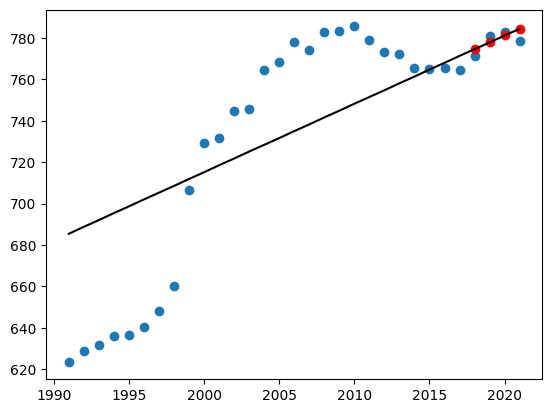

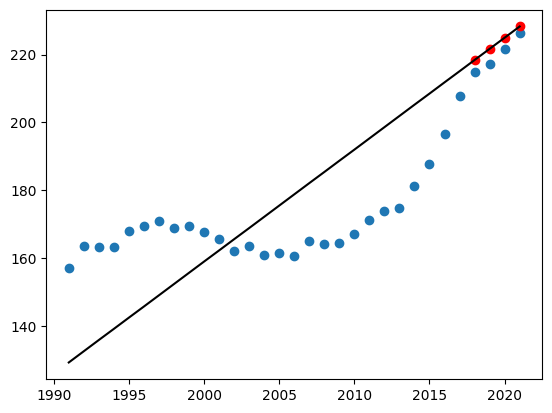

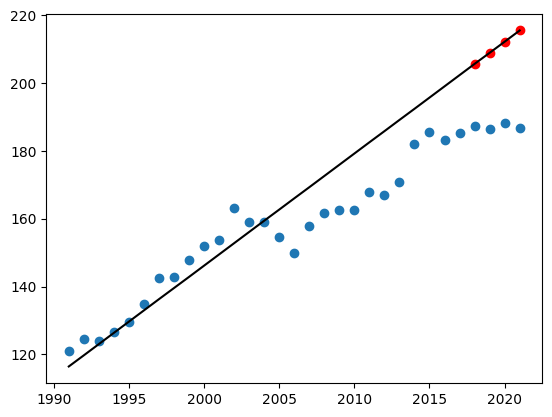

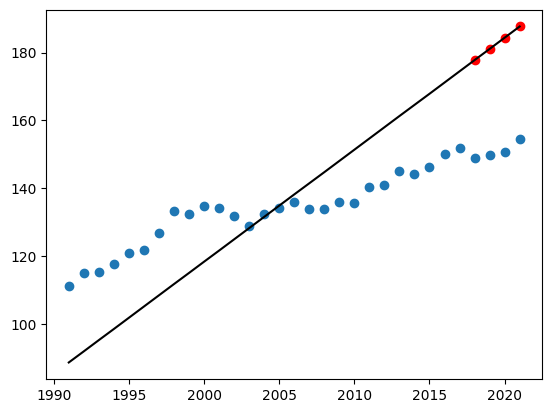

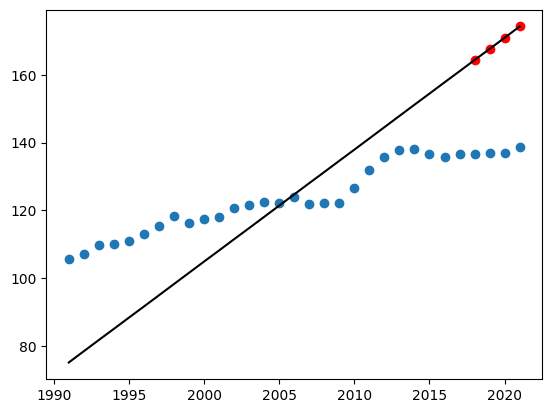

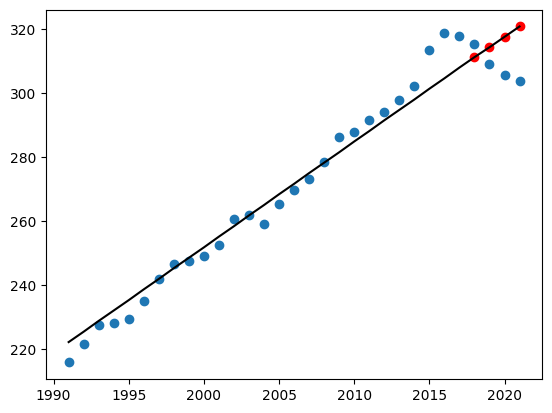

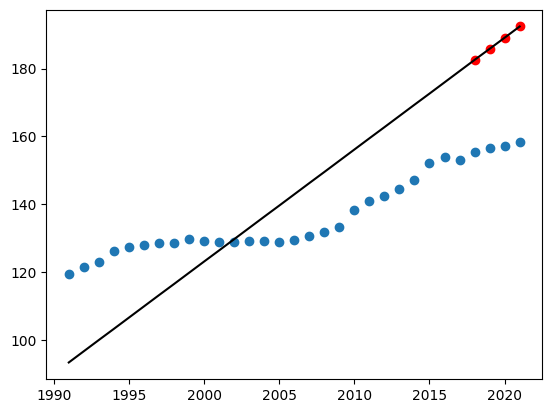

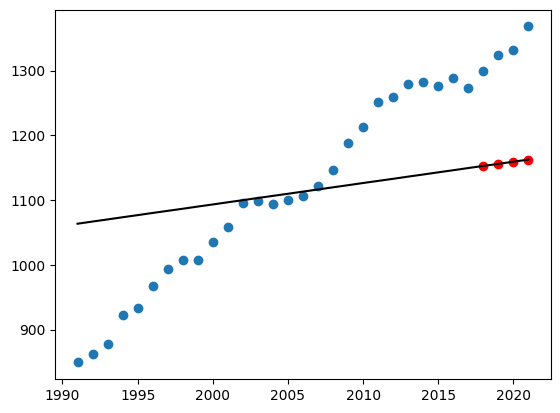

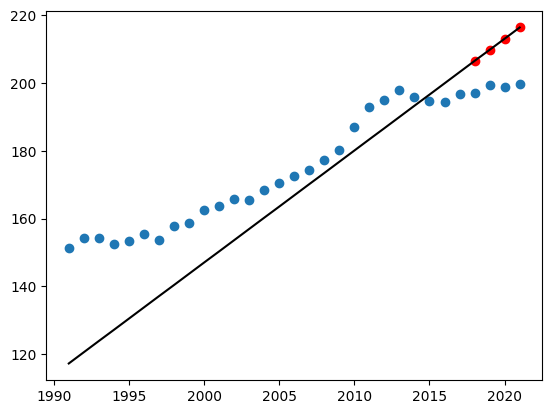

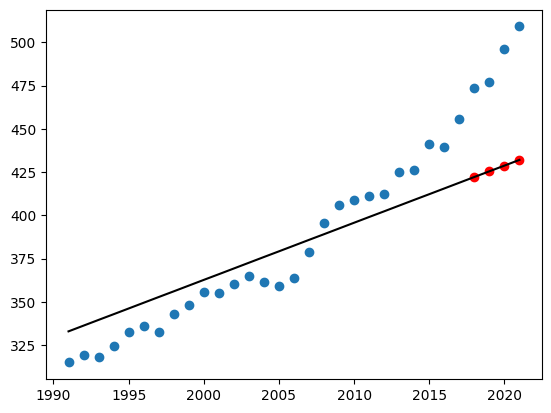

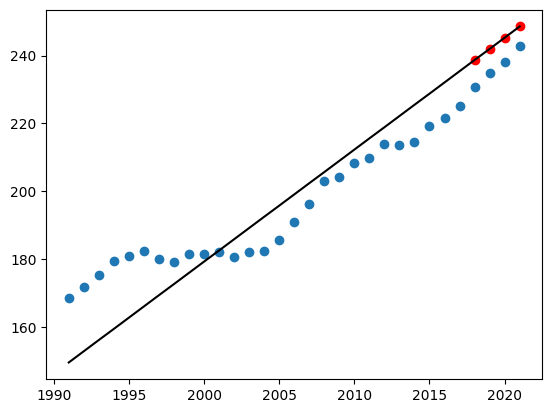

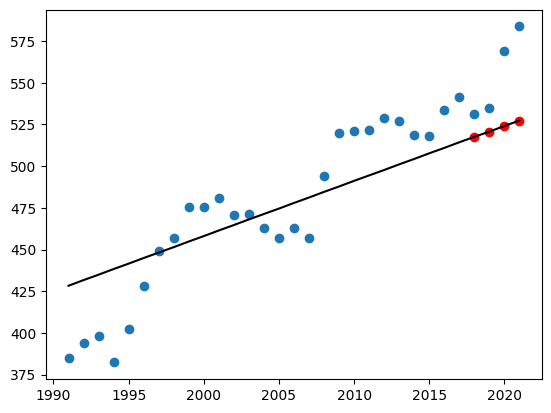

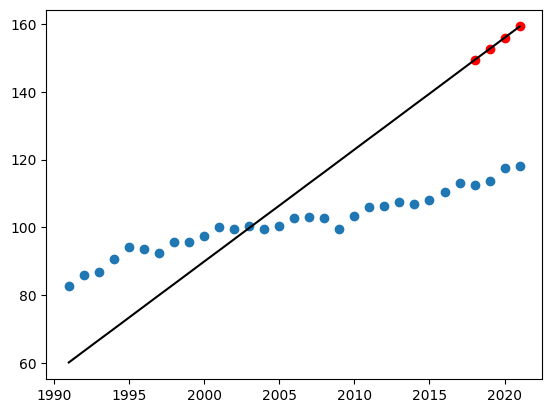

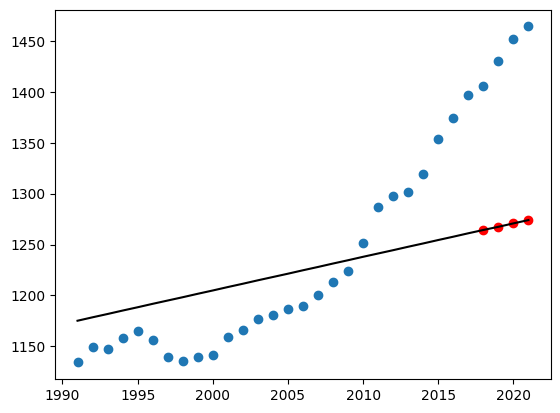

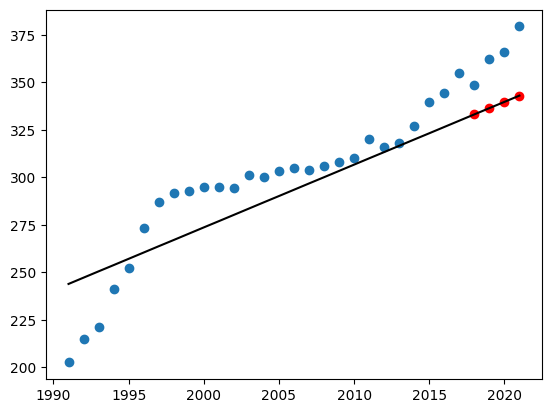

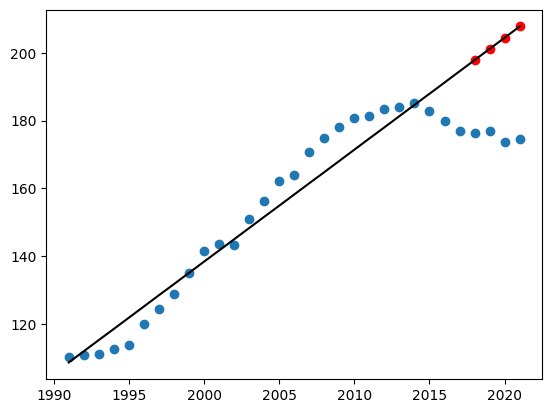

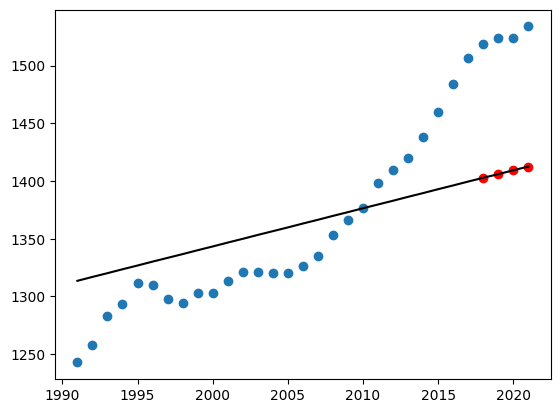

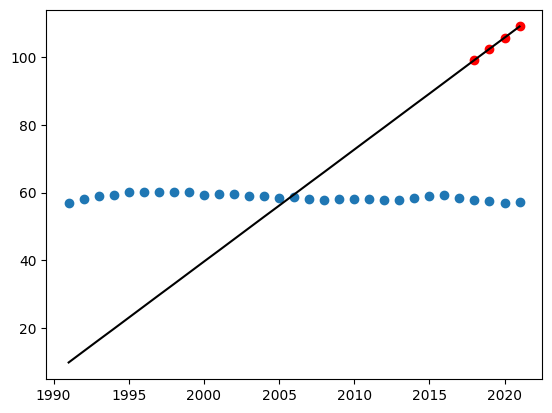

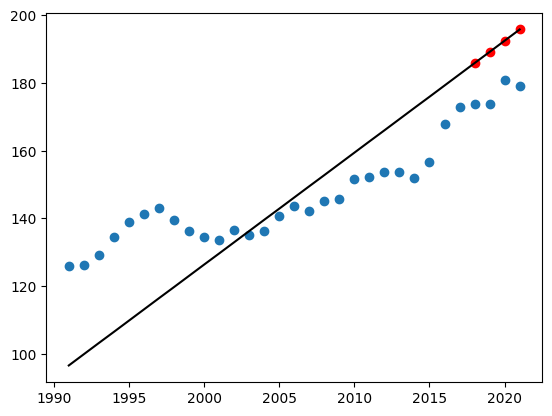

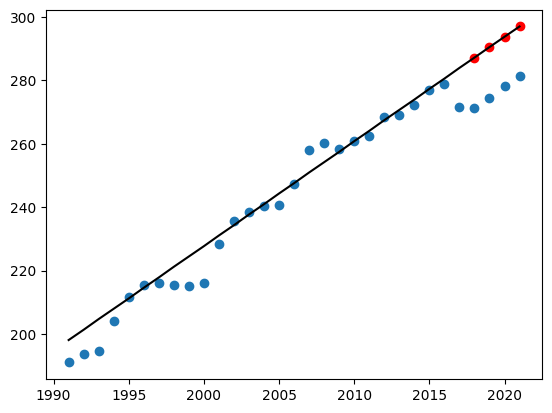

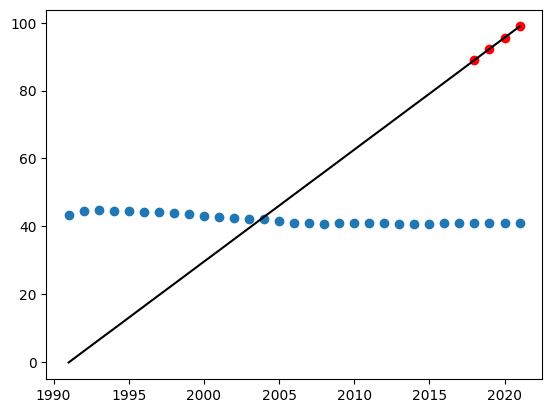

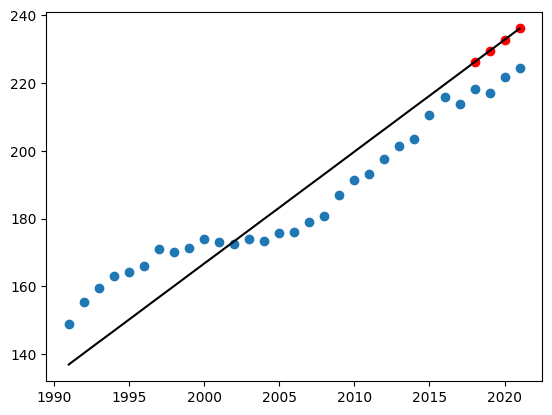

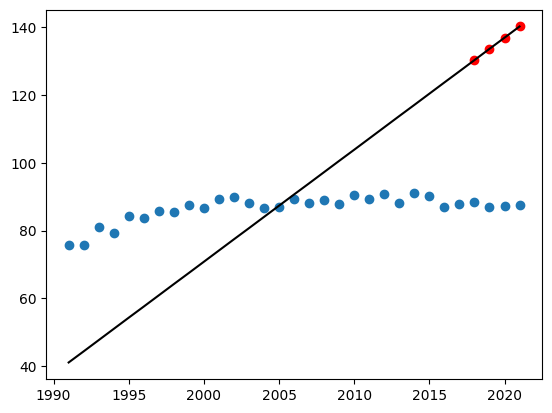

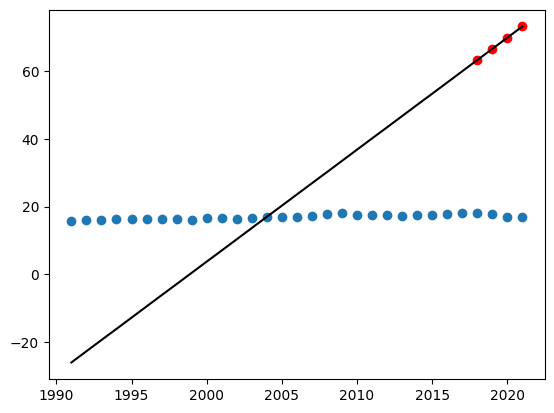

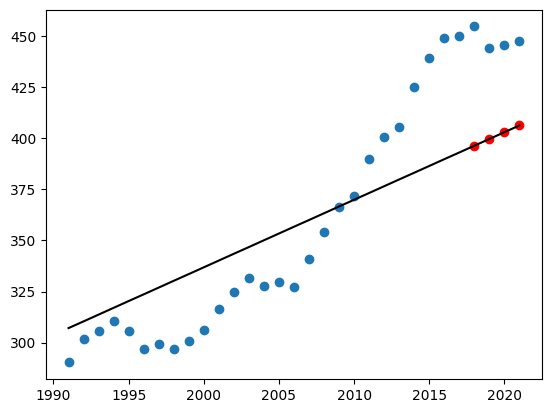

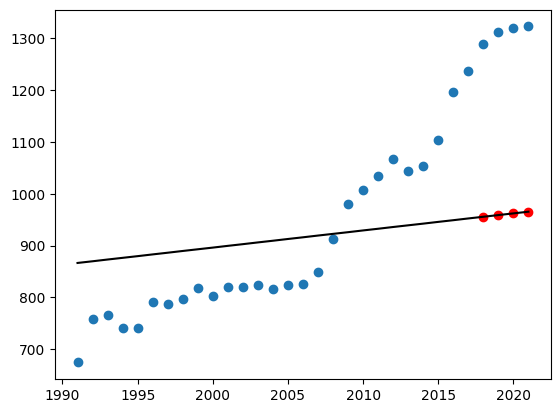

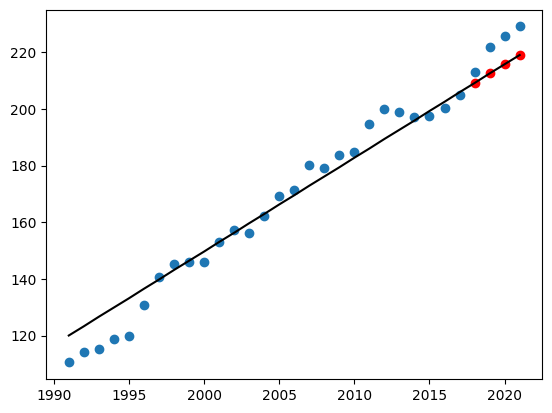

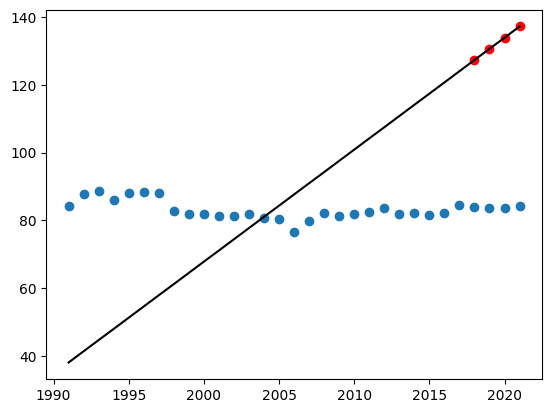

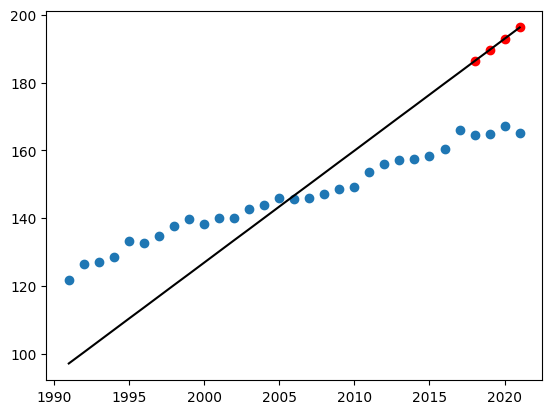

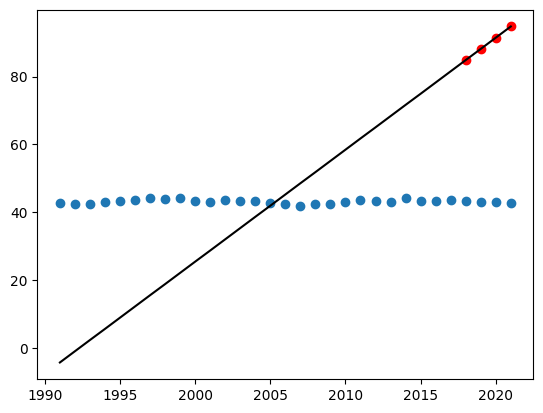

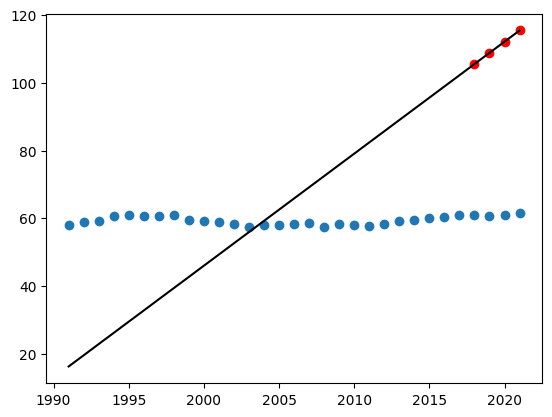

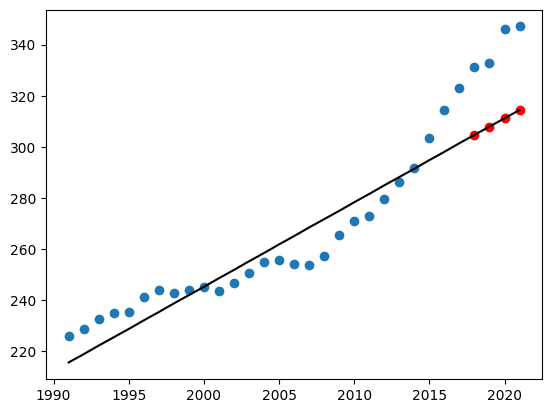

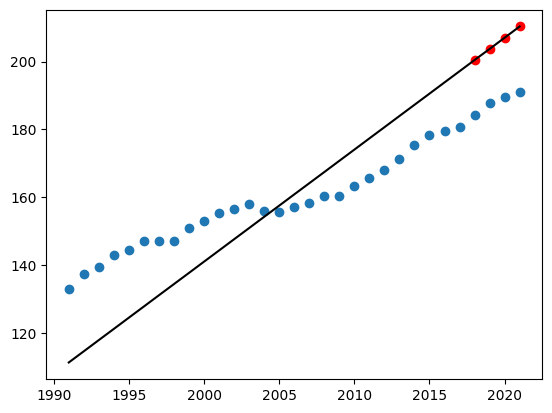

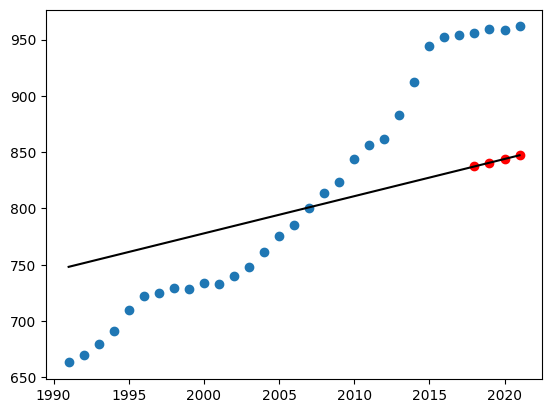

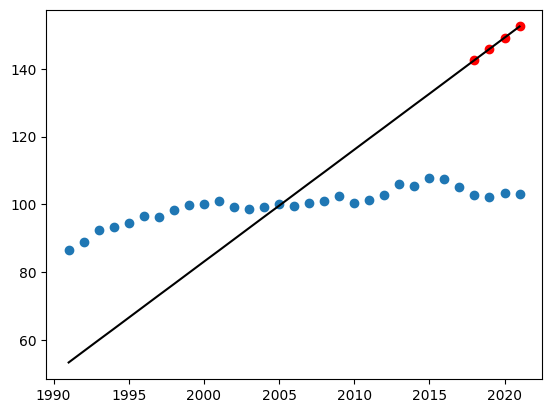

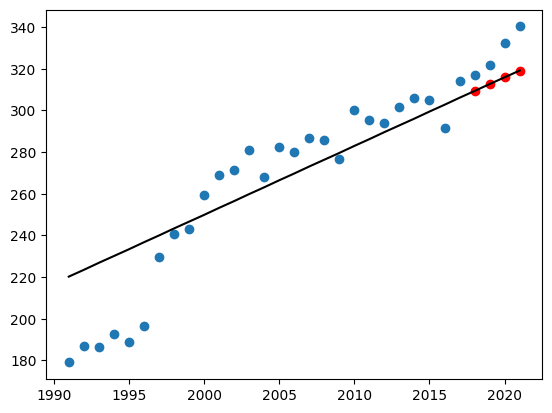

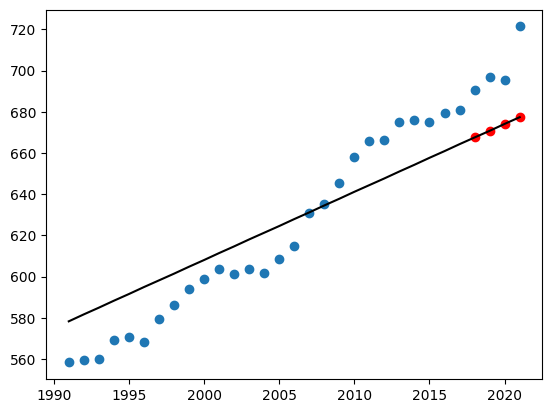

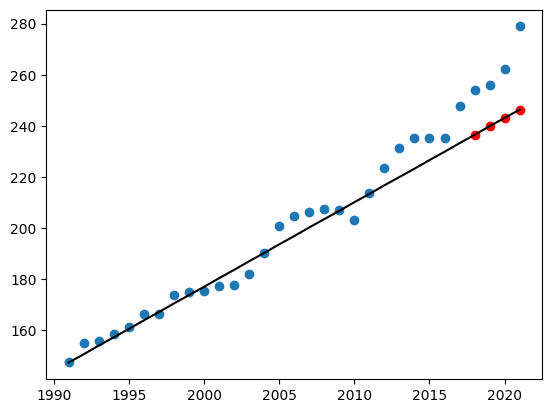

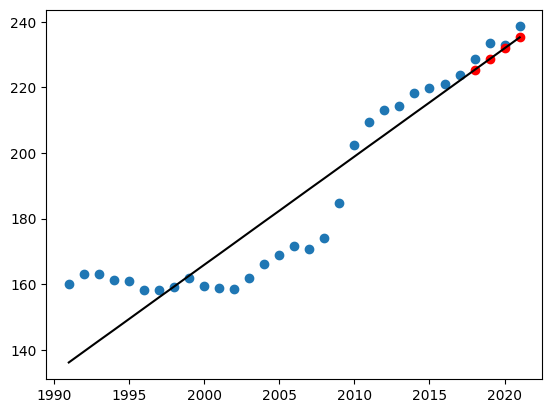

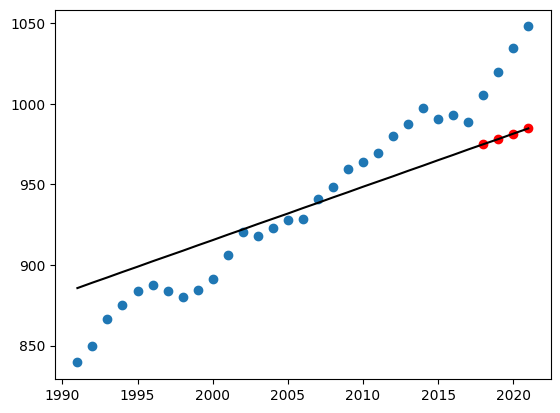

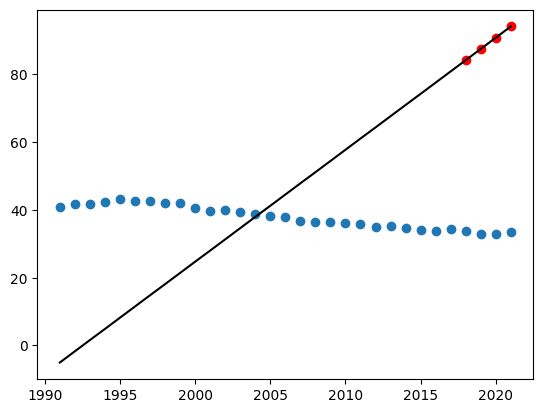

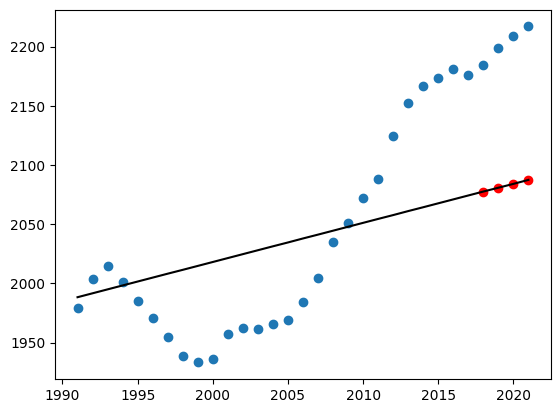

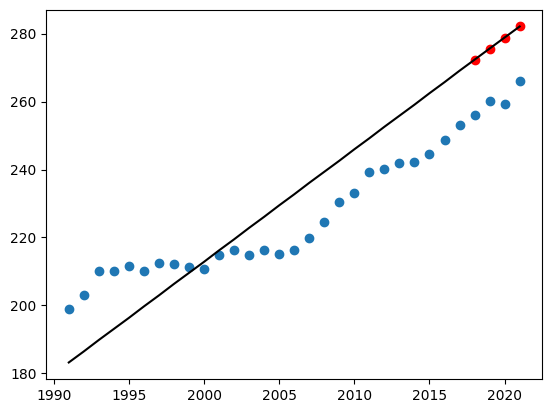

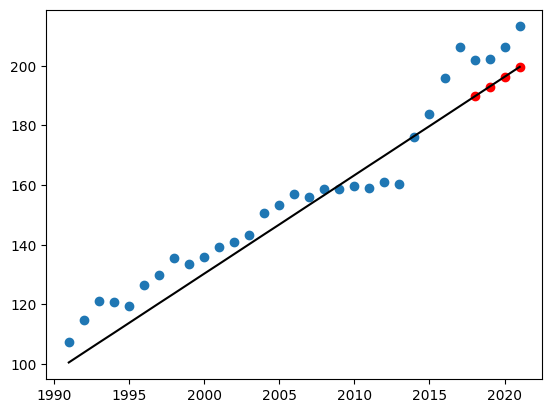

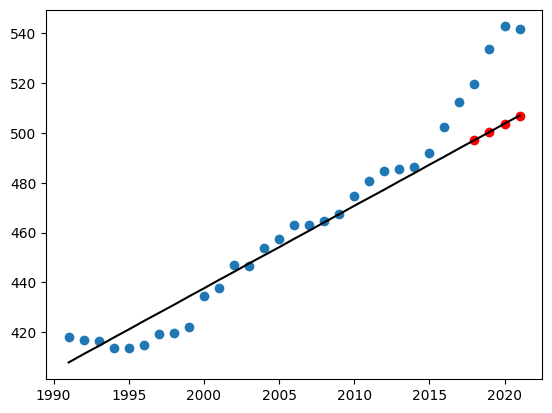

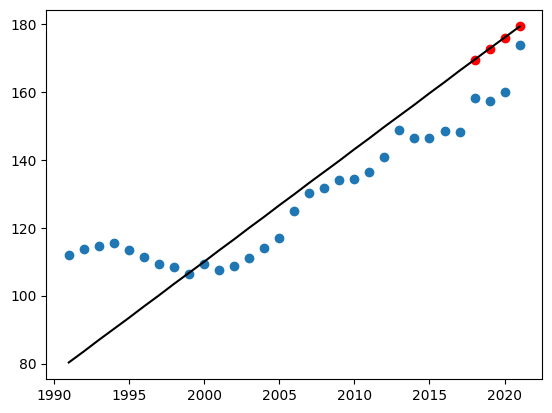

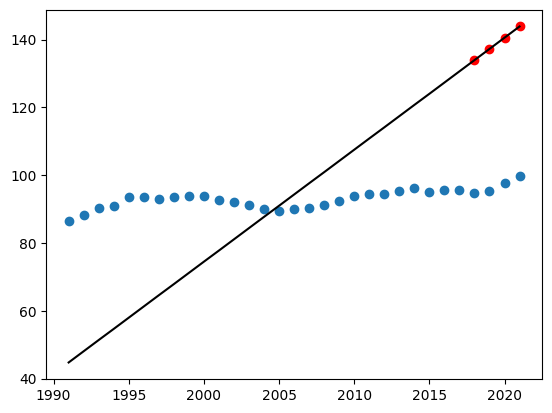

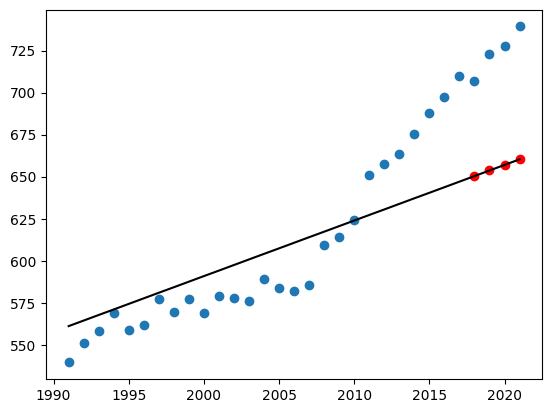

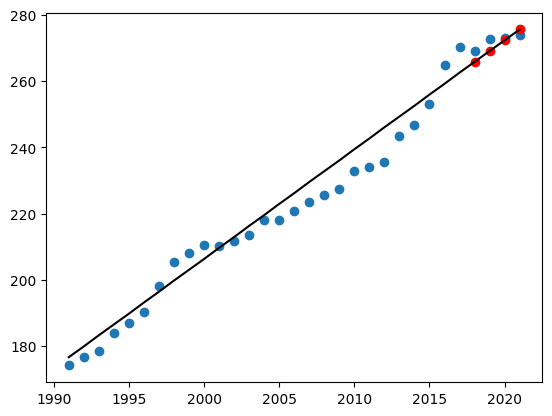

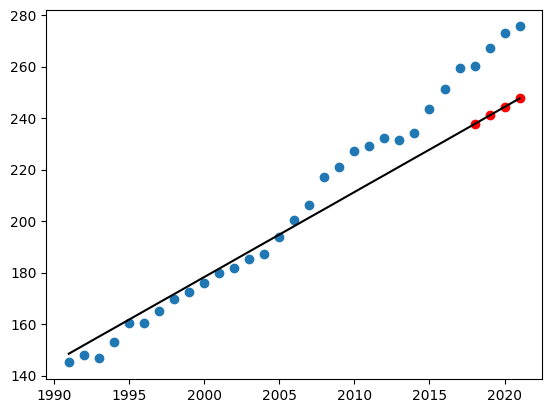

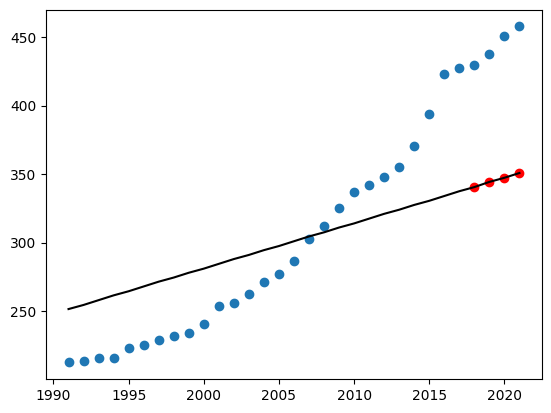

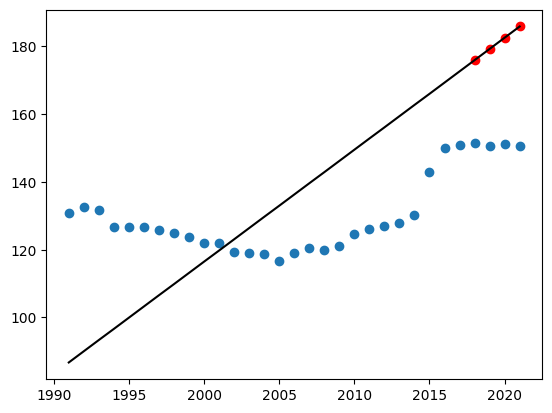

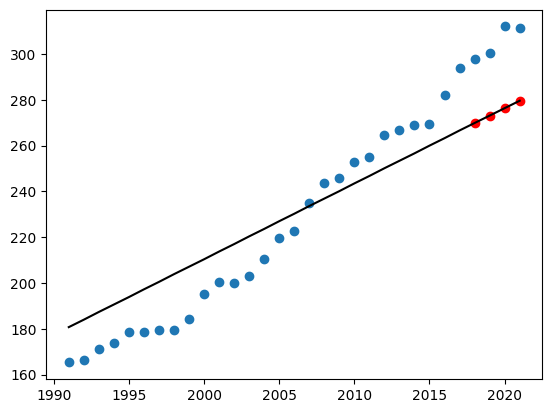

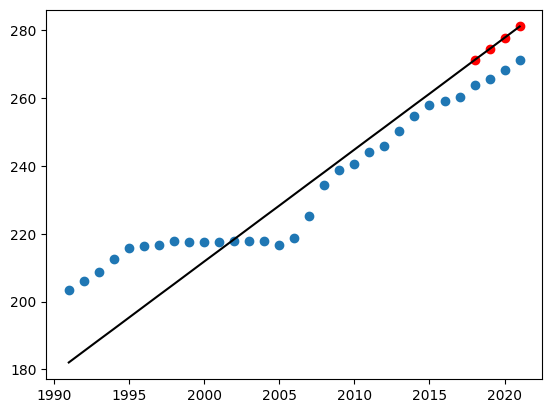

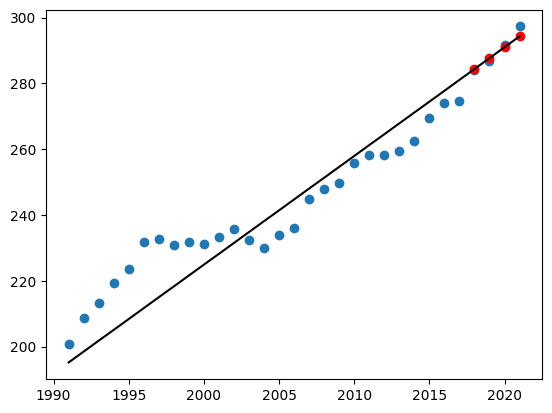

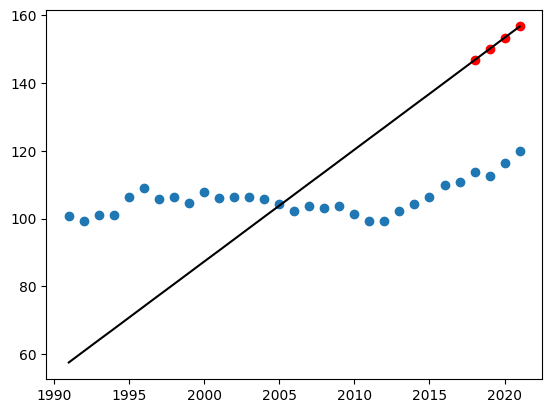

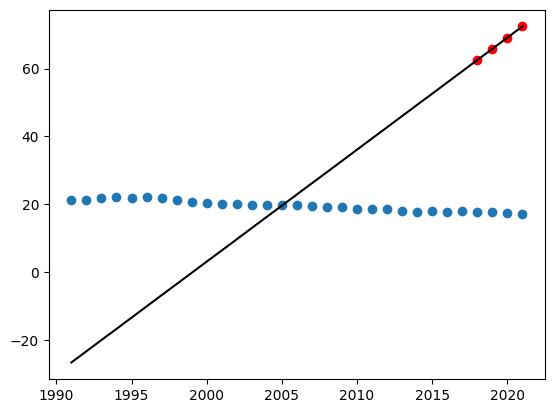

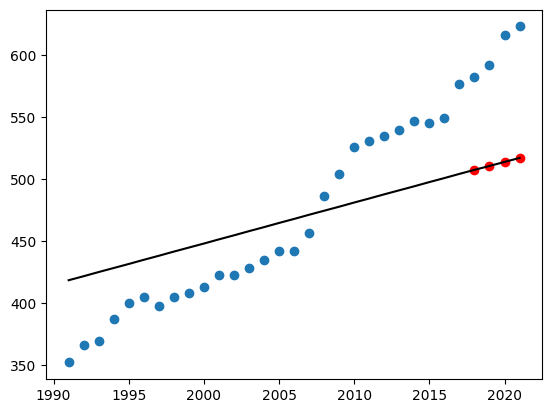

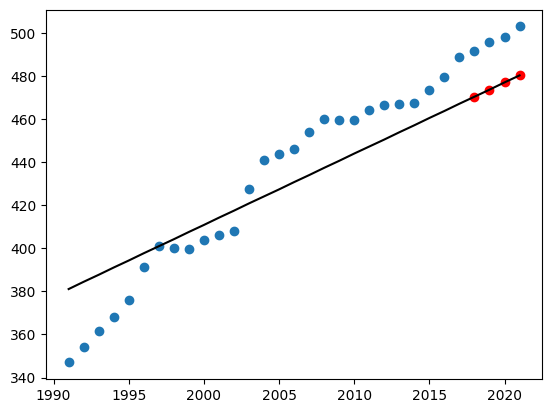

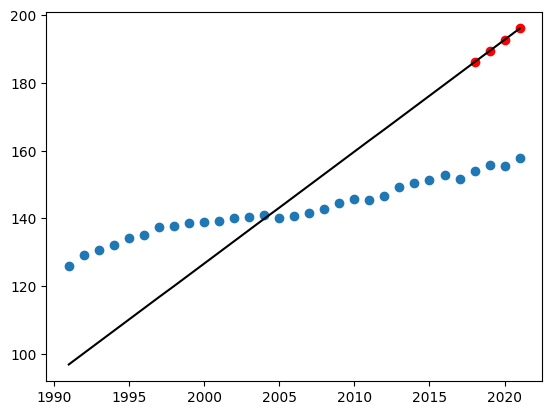

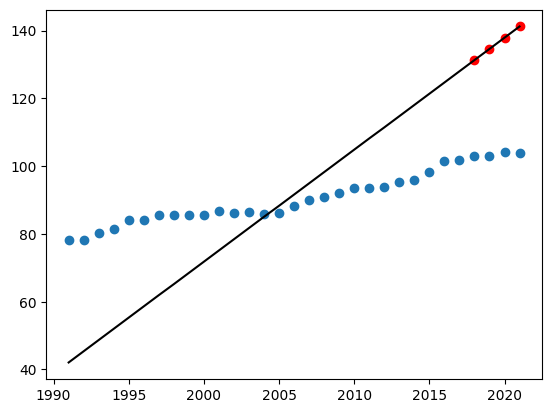

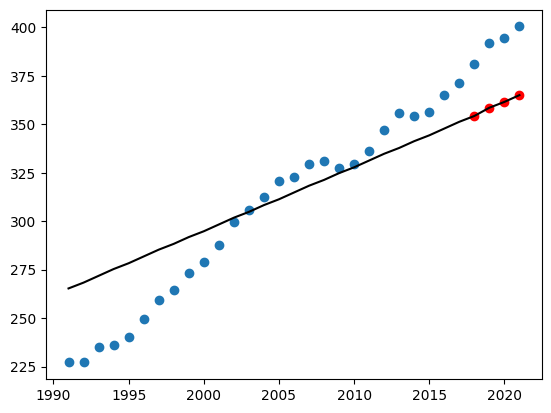

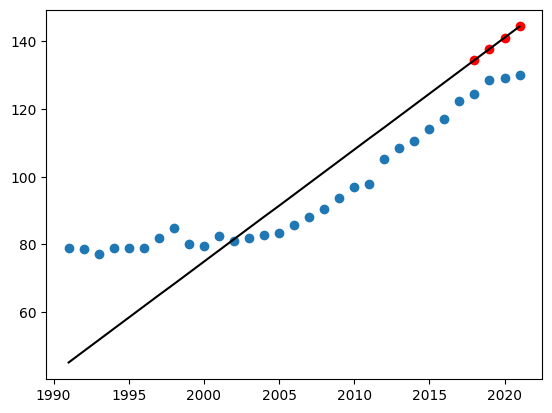

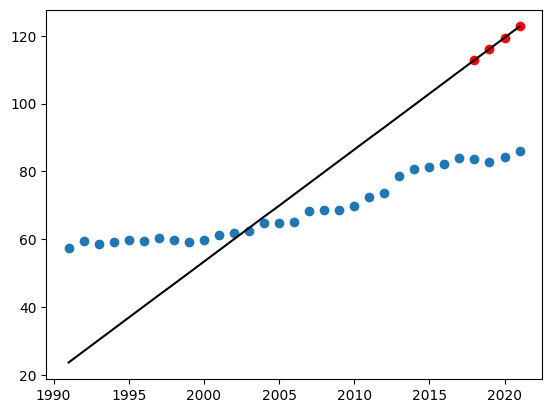

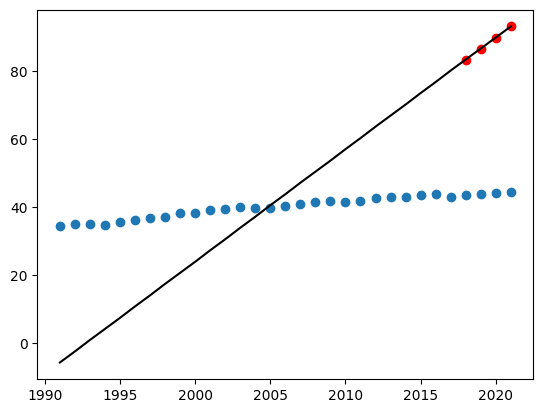

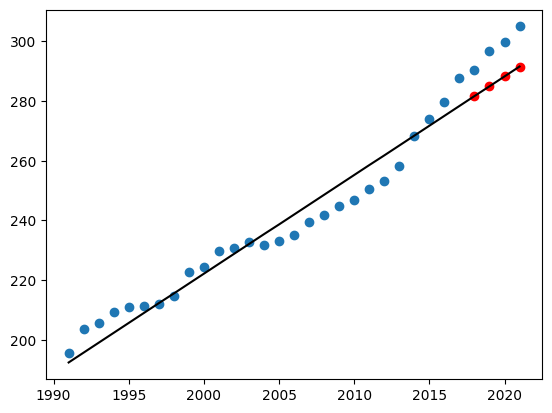

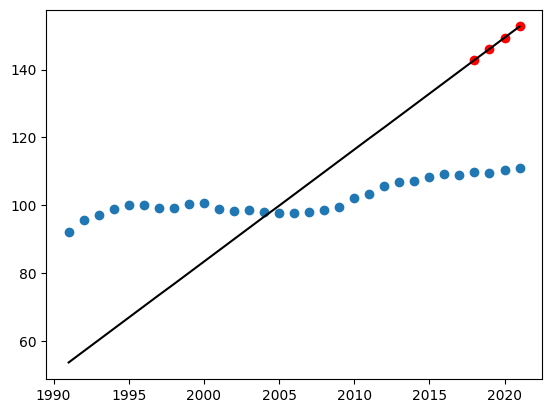

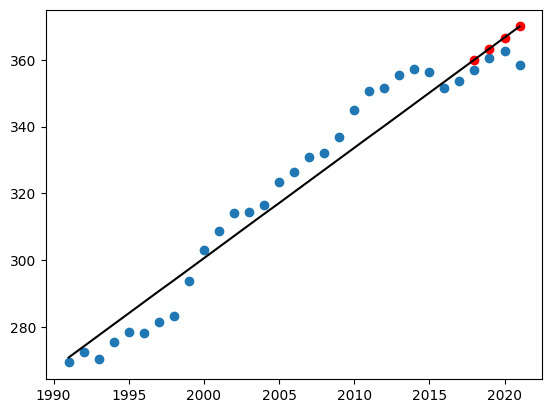

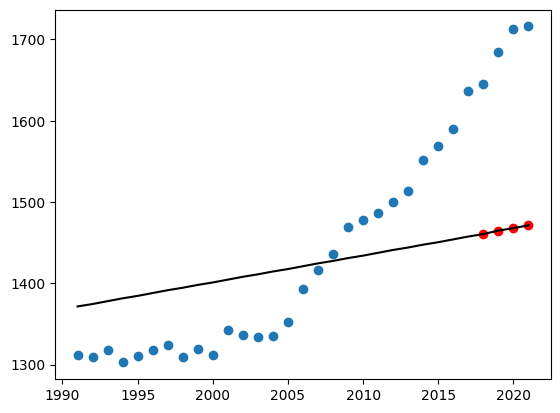

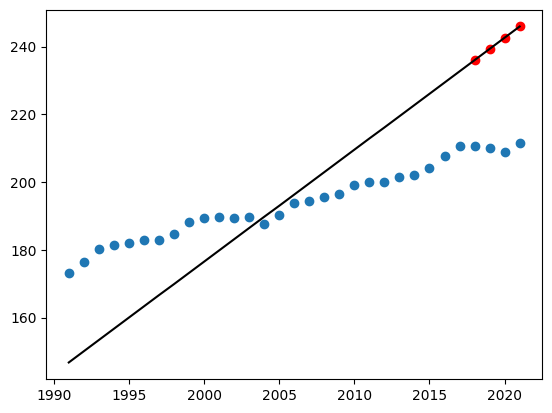

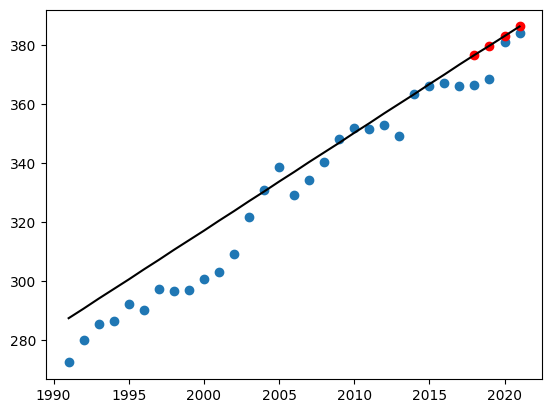

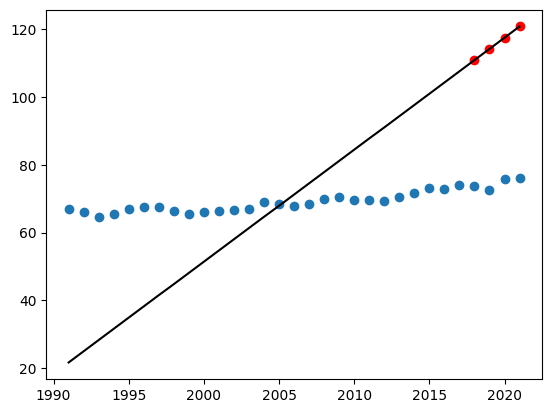

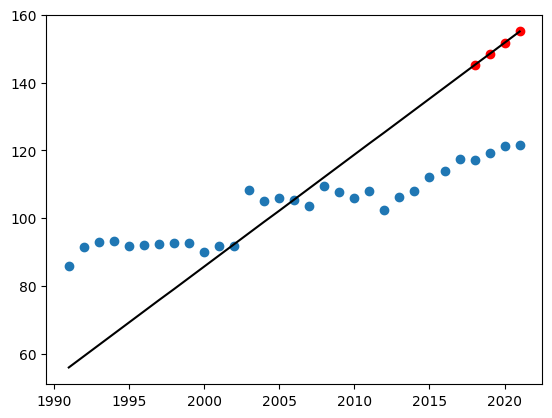

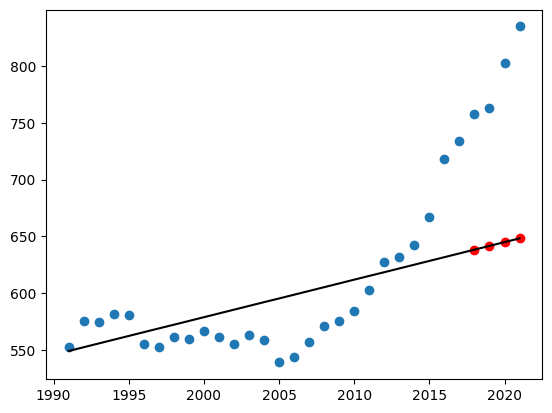

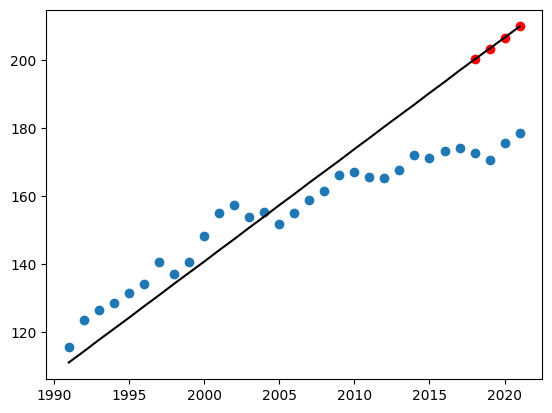

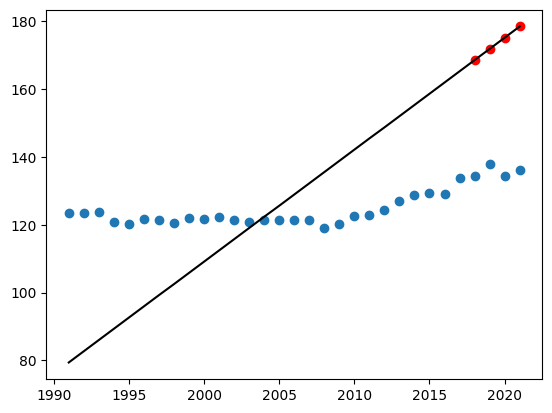

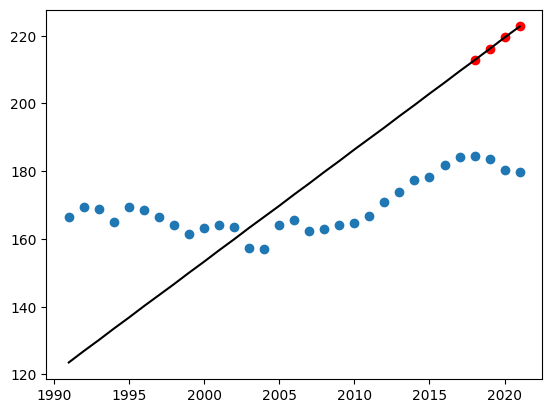

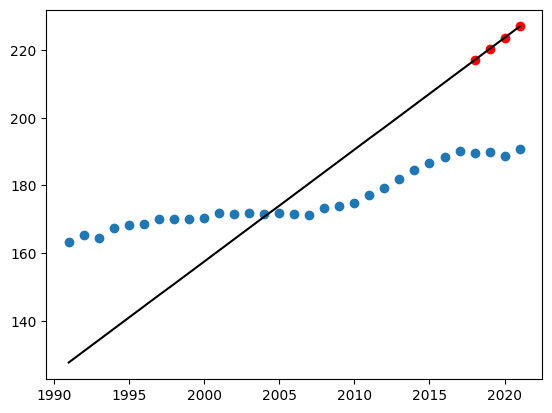

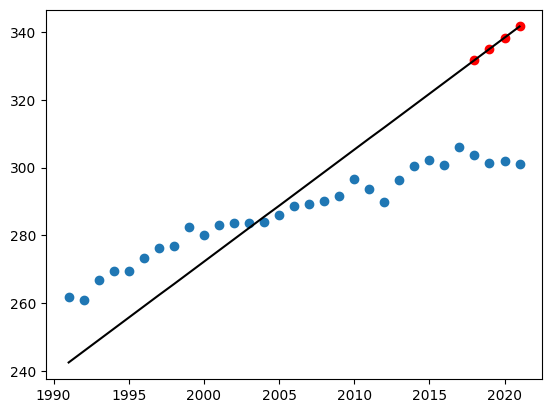

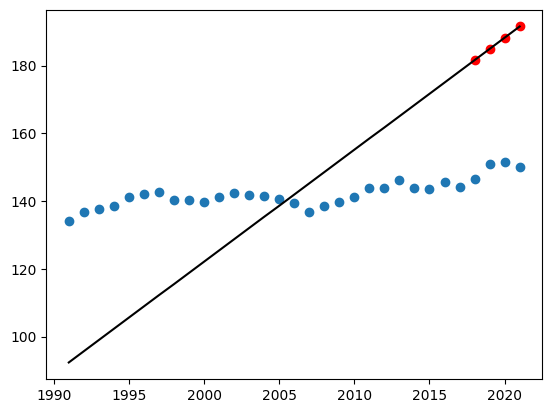

In [140]:
import matplotlib.pyplot as plt

#Gemeinden ploten
for i in range(0,len(gemeinden)):
    ge = df_dummies[df_dummies[gemeinden[i]] == 1]
    columns_drop_2 = ['Mittlere Wohnbevölkerung',
                    'Gemeinde ID',
                    'Ständige Wohnbevölkerung Total',
                    'Ständige Wohnbevölkerung Anteil 0-19-Jährige in %',
                    'Ständige Wohnbevölkerung Anteil 20-64-Jährige in %',
                    'Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %',
                    'Ständige Wohnbevölkerung Ausländer-anteil in %',
                    'Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']

    ge_x = ge.drop(columns_drop_2, axis=1)
    ge_y = ge['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']

    #normalisieren
    ge_x = scaler.transform(ge_x)

    #vorhersage
    ge_pred = model.predict(ge_x)

    Jahre=ge.Jahr.tolist()

    plt.figure()
    plt.scatter(Jahre,ge['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2'])
    plt.plot(Jahre, ge_pred, color="black")
    plt.scatter(Jahre[-4:], ge_pred[-4:], color='red')
    plt.savefig('../Plots_Linear/mit_typologien_2/' + gemeinden[i] + '.png')
    plt.show()
    



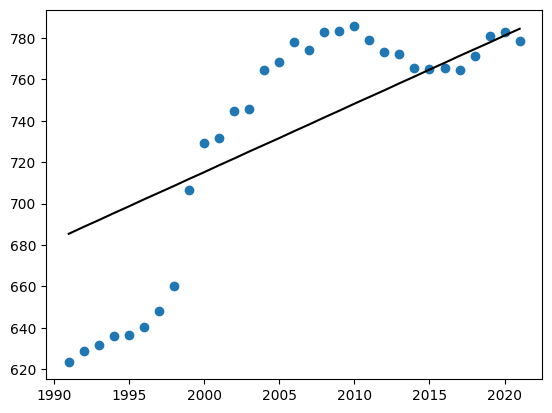